In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')

In [2]:
file_name = 'Python_project_eda.csv'

In [3]:
my_data = pd.read_csv(file_name)

In [4]:
my_data.head(10)

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1
5,0,0.0,ID,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,16960375743361213328,1
6,0,1.0,TH,0,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,14845700381773612658,1
7,0,0.0,ID,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,1407472760358057975,1
8,0,0.0,NaN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,795175088989280187,1
9,0,0.0,GR,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,6034351615620544692,1


In [5]:
my_data.shape

(566699, 15)

In [6]:
np.unique(my_data.user_id).shape

(565505,)

In [7]:
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [8]:
# deal with missing value
my_data['clicked_buy_before'] = my_data['clicked_buy_before'].fillna(0)
my_data['made_purchase_before'] = my_data['made_purchase_before'].fillna(0)
my_data['saw_cart_before'] = my_data['saw_cart_before'].fillna(0)
my_data['user_added_credit_card'] = my_data['user_added_credit_card'].fillna(0)
my_data['user_added_dcb'] = my_data['user_added_dcb'].fillna(0)
my_data['user_added_gift_card'] = my_data['user_added_gift_card'].fillna(0)
my_data['user_added_paypal'] = my_data['user_added_paypal'].fillna(0)
my_data['spend_usd_next_14_days'] = my_data['spend_usd_next_14_days'].fillna(0)

In [9]:
sum(pd.isnull(my_data['initial_fop_set']))

0

In [10]:
sum(pd.isnull(my_data['country']))

12524

In [11]:
my_data['spend_usd_next_14_days'].skew()

58.748328430996601

In [12]:
my_data['spend_usd_next_14_days'].quantile(0.95)

37.860539199999984

### Find correlation

In [13]:
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1
2,0,0.0,IN,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [14]:
# correlation between payment and conversion rate
my_data['if_spend_next_14_days'] = 0
my_data['if_spend_next_14_days'][my_data.spend_usd_next_14_days>0] = 1
my_data.groupby('initial_fop_set')[['if_spend_next_14_days']].mean()

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,if_spend_next_14_days
initial_fop_set,
False,0.007248
True,0.483466


In [15]:
np.mean(my_data.if_spend_next_14_days)

0.15710632981529876

In [16]:
def Conversion(data,payment):
    df = data.groupby(payment)[['if_spend_next_14_days']].mean().reset_index()
    return [df['if_spend_next_14_days'].max()]

def Revenue(data,payment):
    df = data.groupby(payment)[['spend_usd_next_14_days']].mean().reset_index()
    return [df['spend_usd_next_14_days'].max()]

def ConversionPlot(data,payment):
    return data.groupby(payment)[['if_spend_next_14_days']].mean().plot.bar(rot=0)

def Behavior(data,behavior):
    df = data.groupby(behavior)[['if_spend_next_14_days']].mean().reset_index()
    return [df['if_spend_next_14_days'].max()]
def NoBehavior(data,behavior):
    df = data.groupby(behavior)[['if_spend_next_14_days']].mean().reset_index()
    return [df['if_spend_next_14_days'].min()]

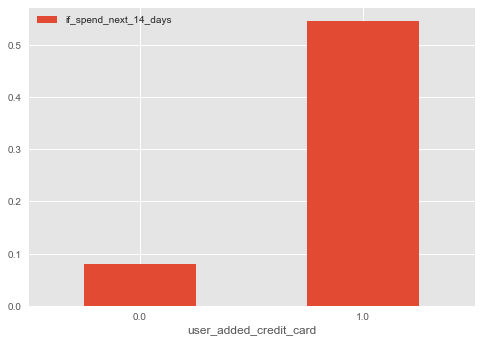

In [17]:
ConversionPlot(my_data,'user_added_credit_card')

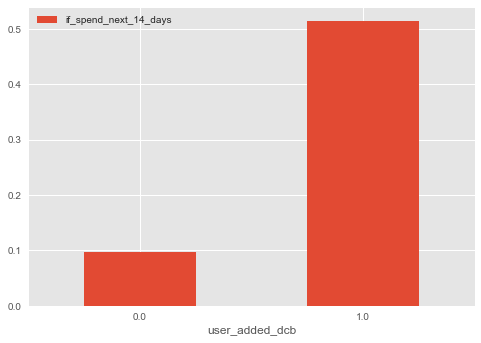

In [18]:
ConversionPlot(my_data,'user_added_dcb')

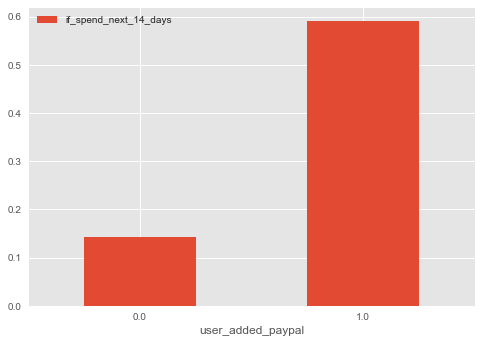

In [19]:
ConversionPlot(my_data,'user_added_paypal')

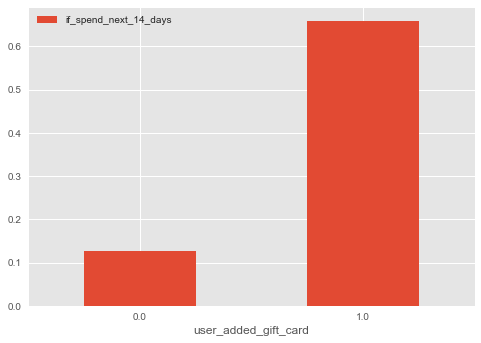

In [20]:
ConversionPlot(my_data,'user_added_gift_card')

In [21]:
# conversion of each payment
payment = {}
payment['credit card'] = Conversion(my_data,'user_added_credit_card')
payment['direct carrier billing'] = Conversion(my_data,'user_added_dcb')
payment['paypal'] = Conversion(my_data,'user_added_paypal')
payment['giftcard'] = Conversion(my_data,'user_added_gift_card')
payment

{'credit card': [0.54615203778504418],
 'direct carrier billing': [0.51373220069669379],
 'giftcard': [0.65846700057059537],
 'paypal': [0.59076778696697752]}

In [22]:
# conversion by different number of fop
conversion_by_fop_num = []
for i in range(4):
    mean = my_data['if_spend_next_14_days'][my_data.user_added_credit_card + my_data.user_added_dcb + my_data.user_added_paypal +
                                 my_data.user_added_gift_card == i+1].mean()
    conversion_by_fop_num.append(mean)
    
conversion_by_fop_num

[0.41618150890054867,
 0.7015712327322577,
 0.8143085647811545,
 0.8105263157894737]

In [23]:
df_num_fop = pd.DataFrame({'number_of_fop':[1,2,3,4],
                          'conversion_rate':conversion_by_fop_num})
df_num_fop

,conversion_rate,number_of_fop
0,0.416182,1
1,0.701571,2
2,0.814309,3
3,0.810526,4


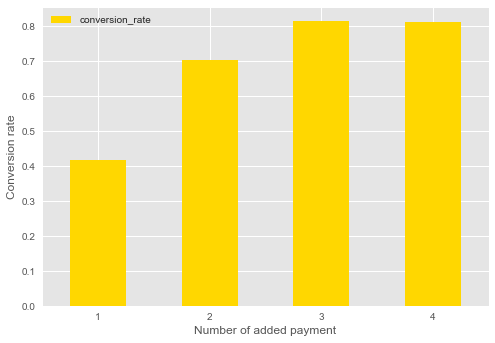

In [24]:
ax = df_num_fop.set_index('number_of_fop').plot.bar(color='gold',rot=0)
ax.set_xlabel('Number of added payment')
ax.set_ylabel('Conversion rate')


In [25]:
df_payment = pd.DataFrame(payment)
fop=df_payment.columns
conversion_rate = df_payment.values[0]
conversion_rate

array([ 0.54615204,  0.5137322 ,  0.658467  ,  0.59076779])

In [26]:
df_fop = pd.DataFrame({'fop': fop,
                        'conversion_rate': conversion_rate})

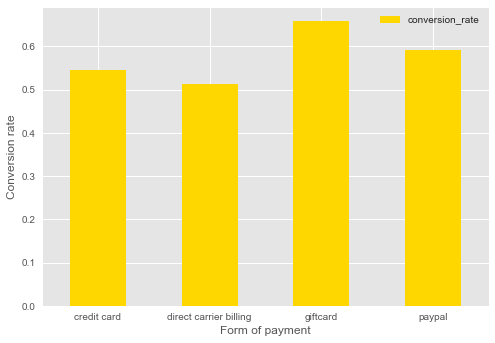

In [27]:
ax = df_fop.set_index('fop').plot.bar(color='gold',rot=0)
ax.set_xlabel('Form of payment')
ax.set_ylabel('Conversion rate')


In [28]:
# correlation between payment and money users spend
my_data.groupby('user_added_credit_card')[['spend_usd_next_14_days']].mean()

,spend_usd_next_14_days
user_added_credit_card,
0.0,3.976674
1.0,44.407306


In [29]:
my_data.groupby('user_added_dcb')[['spend_usd_next_14_days']].mean()

,spend_usd_next_14_days
user_added_dcb,
0.0,5.515787
1.0,41.100526


In [30]:
my_data.groupby('user_added_paypal')[['spend_usd_next_14_days']].mean()

,spend_usd_next_14_days
user_added_paypal,
0.0,9.741144
1.0,40.057284


In [31]:
my_data.groupby('user_added_gift_card')[['spend_usd_next_14_days']].mean()

,spend_usd_next_14_days
user_added_gift_card,
0.0,7.372551
1.0,66.306780


In [32]:
payment_revenue = {}
payment_revenue['credit card'] = Revenue(my_data,'user_added_credit_card')
payment_revenue['direct carrier billing'] = Revenue(my_data,'user_added_dcb')
payment_revenue['paypal'] = Revenue(my_data,'user_added_paypal')
payment_revenue['giftcard'] = Revenue(my_data,'user_added_gift_card')
payment_revenue

{'credit card': [44.407305551704056],
 'direct carrier billing': [41.100525526615847],
 'giftcard': [66.306780402711638],
 'paypal': [40.057284320838889]}

In [33]:
df_payment_revenue = pd.DataFrame(payment_revenue)
fop=df_payment_revenue.columns
revenue = df_payment_revenue.values[0]
df_fop_revenue = pd.DataFrame({'fop': fop,
                        'avg_spend': revenue})

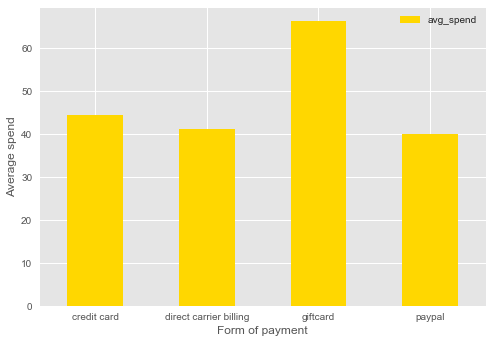

In [34]:
ax = df_fop_revenue.set_index('fop').plot.bar(color='gold',rot=0)
ax.set_xlabel('Form of payment')
ax.set_ylabel('Average spend')

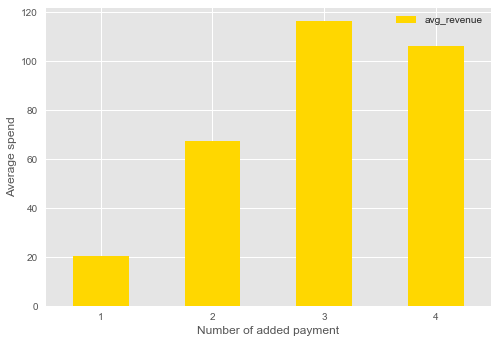

In [35]:
revunue_by_fop_num = []
for i in range(4):
    mean = my_data['spend_usd_next_14_days'][my_data.user_added_credit_card + my_data.user_added_dcb + my_data.user_added_paypal +
                                 my_data.user_added_gift_card == i+1].mean()
    revunue_by_fop_num.append(mean)
    
df_num_fop_revunue = pd.DataFrame({'number_of_fop':[1,2,3,4],
                          'avg_revenue':revunue_by_fop_num})
ax = df_num_fop_revunue.set_index('number_of_fop').plot.bar(color='gold',rot=0)
ax.set_xlabel('Number of added payment')
ax.set_ylabel('Average spend')

### Correlation with user behavior

In [36]:
my_data.groupby('visit_before')[['if_spend_next_14_days']].mean().reset_index()

,visit_before,if_spend_next_14_days
0,0,0.053561
1,1,0.171951


In [37]:
my_data.groupby('saw_cart_before')[['if_spend_next_14_days']].mean().reset_index()

,saw_cart_before,if_spend_next_14_days
0,0.0,0.042862
1,1.0,0.182766


In [38]:
my_data.groupby('clicked_buy_before')[['if_spend_next_14_days']].mean().reset_index()

,clicked_buy_before,if_spend_next_14_days
0,0.0,0.023769
1,1.0,0.615174


In [39]:
my_data.groupby('visit_before')[['spend_usd_next_14_days']].mean().reset_index()

,visit_before,spend_usd_next_14_days
0,0,0.823775
1,1,12.062424


In [40]:
my_data.groupby('saw_cart_before')[['spend_usd_next_14_days']].mean().reset_index()

,saw_cart_before,spend_usd_next_14_days
0,0.0,0.649659
1,1.0,12.900060


In [41]:
my_data.groupby('clicked_buy_before')[['spend_usd_next_14_days']].mean()

,spend_usd_next_14_days
clicked_buy_before,
0.0,0.333751
1.0,46.104726


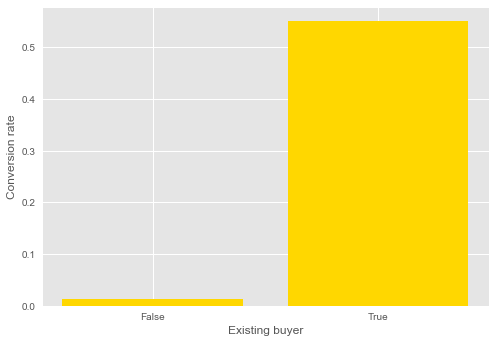

In [42]:
a = my_data.groupby('existing_buyer')[['if_spend_next_14_days']].mean().reset_index()
plt.bar(a.existing_buyer,a.if_spend_next_14_days,align='center',color='gold')
plt.xticks([0,1],['False','True'])
plt.xlabel('Existing buyer')
plt.ylabel('Conversion rate')

In [43]:
my_data.groupby('existing_buyer')[['spend_usd_next_14_days']].mean()

,spend_usd_next_14_days
existing_buyer,
0,0.199445
1,39.186304


In [44]:
behavior = {}
behavior['saw cart'] = Behavior(my_data,'saw_cart_before')
behavior['clicked buy'] = Behavior(my_data,'clicked_buy_before')
behavior['no visit']= NoBehavior(my_data,'visit_before')
behavior['no cart']= NoBehavior(my_data,'saw_cart_before')

df_behavior = pd.DataFrame(behavior)
behaviors=df_behavior.columns
conversion_behavior = df_behavior.values[0]
df_behavior_conversion = pd.DataFrame({'behaviors': behaviors,
                        'conversion': conversion_behavior})

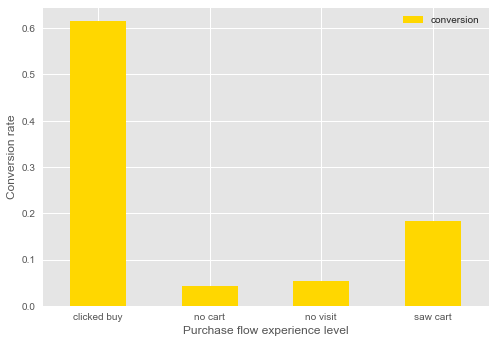

In [45]:
ax = df_behavior_conversion.set_index('behaviors').plot.bar(color='gold',rot=0)
ax.set_xlabel('Purchase flow experience level')
ax.set_ylabel('Conversion rate')

In [46]:
data_us = my_data[my_data.country == 'US']

In [47]:
data_us.shape

(66011, 16)

In [48]:
data_us.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before,if_spend_next_14_days
14,0,1.0,US,1,True,1.0,1.0,33.82,1.0,1.0,1,0.0,1.0,10301202680834406137,1,1
17,1,1.0,US,1,True,1.0,1.0,1.98,1.0,0.0,1,1.0,0.0,16569805868309262813,1,1
25,0,1.0,US,1,True,1.0,1.0,0.00,0.0,0.0,0,0.0,0.0,597021183915827167,1,0
43,0,0.0,US,1,True,0.0,1.0,0.00,0.0,1.0,1,0.0,0.0,11676406094140140796,1,0
51,8,1.0,US,1,True,1.0,1.0,71.82,1.0,0.0,1,0.0,0.0,4756932245224773331,1,1


In [49]:
payment_us = {}
payment_us['credit_card'] = Conversion(data_us,'user_added_credit_card')
payment_us['direct_carrier_billing'] = Conversion(data_us,'user_added_dcb')
payment_us['paypal'] = Conversion(data_us,'user_added_paypal')
payment_us['giftcard'] = Conversion(data_us,'user_added_gift_card')
payment_us

{'credit_card': [0.56829828591623965],
 'direct_carrier_billing': [0.53001579778830965],
 'giftcard': [0.61120129870129869],
 'paypal': [0.62411238036430994]}

In [50]:
data_jp = my_data[my_data.country == 'JP']

In [51]:
data_jp.shape

(18916, 16)

In [52]:
payment_jp = {}
payment_jp['credit_card'] = Conversion(data_jp,'user_added_credit_card')
payment_jp['direct_carrier_billing'] = Conversion(data_jp,'user_added_dcb')
payment_jp['paypal'] = Conversion(data_jp,'user_added_paypal')
payment_jp['giftcard'] = Conversion(data_jp,'user_added_gift_card')
payment_jp

{'credit_card': [0.90723301943498302],
 'direct_carrier_billing': [0.86157567380787836],
 'giftcard': [0.9098014888337469],
 'paypal': [0.80467799121553685]}

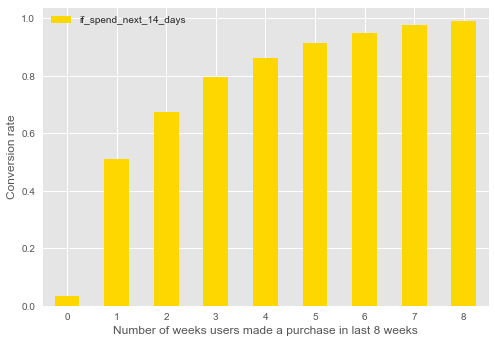

In [53]:
ax = my_data.groupby('buyer_week_before')[['if_spend_next_14_days']].mean().plot.bar(color='gold',rot=0)
ax.set_xlabel('Number of weeks users made a purchase in last 8 weeks')
ax.set_ylabel('Conversion rate')

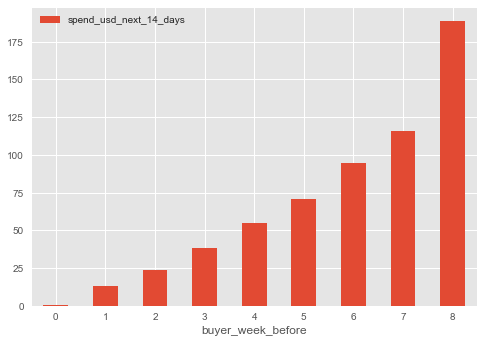

In [54]:
my_data.groupby('buyer_week_before')[['spend_usd_next_14_days']].mean().plot.bar(rot=0)

## A/B testing

In [55]:
data = pd.read_csv('Python_project_experiment.csv')

In [56]:
data.head()

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,NaN,NaN,12624549,,0.0,3,16554430871838092438,NaN
1,NaN,NaN,12624548,,0.0,14,14411542309984779713,NaN
2,NaN,NaN,12624549,,0.0,20,8425202140671508556,NaN
3,NaN,NaN,12624549,,0.0,16,11302731652742770675,NaN
4,NaN,NaN,12624549,,0.0,14,1399243101040681867,NaN


In [57]:
sum(data.date.isnull()),sum(data.country.isnull())

(36815, 36827)

In [58]:
data.shape

(49166, 8)

In [59]:
data.groupby('country').size()

country
AE       2
AT      61
AU     228
BE      62
BR     252
CA     245
CH     121
CZ       1
DE     669
DK      37
ES     134
FI      22
FR     386
GB     652
GR      12
HK     119
ID     228
IE      25
IN      87
IT     276
JP    2345
KR    1374
LV       1
MX       1
MY       1
NL      95
NO      73
NZ      33
OM       3
PL      46
PT      21
SE      44
SG      65
TH       3
TR     187
US    4364
ZA      64
dtype: int64

In [60]:
data['date']= pd.to_datetime(data.date)

In [61]:
treatment = data['spend_usd'][data.experiment_id==12624548]
control = data['spend_usd'][data.experiment_id==12624549]

In [62]:
treatment.mean(),control.mean()

(3.1012323775663218, 2.807224857586508)

In [63]:
treatment.std(),control.std()

(11.647486941709795, 10.974283987911727)

In [64]:
treatment.shape,control.shape

((24695,), (24471,))

In [65]:
stats.ttest_ind(treatment,control)

Ttest_indResult(statistic=2.8801076680362367, pvalue=0.0039771105693932841)

In [66]:
no_difference = data.groupby('date')['spend_usd'].mean()
no_difference[:] = 0

In [67]:
def GetCumulativeSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return((series,total_revenue))
    
# same as before
def PlotRevenueUplift(uplift_rate):
    fig, ax = plt.subplots()
    ax.plot(uplift_rate)
    ax.plot(no_difference)
    ax.set_ylabel("Revenue uplift(%)")
    ax.grid(True, which="both")
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeRenenueUplift(my_data, experiment_ids):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0])[0]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1])[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0])[1]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1])[1]
    uplift_rate = (treatment_series - control_series)/control_series
    print("Cumulative revenue impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotRevenueUplift(uplift_rate)

In [68]:
table = data.groupby('date').size().reset_index()

In [69]:
date = table['date'].values

In [70]:
def ttest(data,experiment_days,experiment_id):
    a = data['spend_usd'][day[0]][data.experiment_id == experiment_id[0]]
    b = data['spend_usd'][day[0]][data.experiment_id == experiment_id[1]]
    for i in range(experiment_days-1):
        
        a_one_day = data['spend_usd'][day[i+1]][data.experiment_id == experiment_id[0]]
        a = a.append(a_one_day)
        b_one_day = data['spend_usd'][day[i+1]][data.experiment_id == experiment_id[1]]
        b = b.append(b_one_day)
    return stats.ttest_ind(a,b).pvalue
    

In [71]:
day = []
for i in range(7):    
    day.append(data.date==date[i])

[0.60365169125027407, 0.58382267685586786, 0.093223118598504795, 0.12222827240640532, 0.0097839353730499578, 0.12593807504108392, 0.23569607525498226]


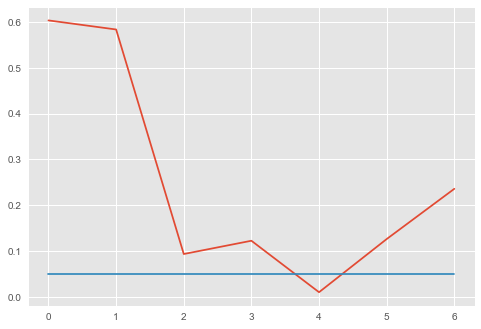

In [72]:
p_values =[]
number_of_experiment_days = 7
experiment_id = [12624548,12624549]
country = 'US'
for days in range(number_of_experiment_days):
    p_values.append(ttest(data,days+1,experiment_id))
print p_values
plt.plot(p_values)
plt.plot(range(7),[0.05,0.05,0.05,0.05,0.05,0.05,0.05])

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: In the future, NAT != NAT will be True rather than False.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Cumulative revenue impact: 11.4844824597%


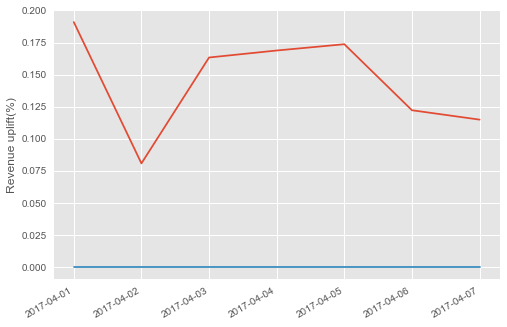

In [73]:
PrintCumulativeRenenueUplift(data, experiment_id)